<a href="https://colab.research.google.com/github/vondersam/sdgs_text_classifier/blob/master/experiments/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!python -m spacy download en_core_web_lg
#nlp = spacy.load("en_core_web_lg")
#!pip3 install textacy
#import textacy

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import spacy
from collections import Counter
from  itertools import chain
from sklearn.preprocessing import MultiLabelBinarizer

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
base_dir = "gdrive/My Drive/fastai-v3/sdgs/dataset/"
labelled_dataset = base_dir + "cleanup_labelled.csv"
unlabelled_dataset = base_dir + "cleanup_unlabelled_u.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Unlabelled Data

In [0]:
unlabelled = pd.read_csv(unlabelled_dataset)
print(f"Number of unlabelled texts: {unlabelled.count()['text']}")

## Size of the vocabulary (unique tokens) of the unlabelled dataset

In [0]:
#u_corpus = textacy.Corpus("en")
#u_corpus.add_texts(unlabelled.text.tolist())
#u_corpus.save(base_dir + "unlabelled_corpus_tokens.bin.gz")
#u_corpus = textacy.Corpus.load("en", base_dir + 'textacy_docs/unlabelled_corpus_tokens.bin.gz')

In [0]:
#u_wordcounts = u_corpus.word_counts(normalize='lower', as_strings=True)
#print(f"Size of vocabulary: {len(u_wordcounts)}")

Size of vocabulary: 232946


## Words with most occurrences in the unlabelled dataset

In [0]:
u_wordcounts_sorted = sorted(u_wordcounts.items(), key=lambda kv: kv[1])
u_wordcounts_sorted.reverse()
u_wordcounts_sorted[:10]

[('development', 98150),
 ('sustainable', 58337),
 ('countries', 51636),
 ('women', 41239),
 ('’s', 40066),
 ('international', 37817),
 ('national', 35587),
 ('united', 32147),
 ('energy', 31975),
 ('economic', 31259)]

# Labelled Data

In [0]:
labelled = pd.read_csv(labelled_dataset)
labelled['labels'] = labelled.labels.str.split('|').apply(lambda x: [int(i) for i in x])
print(f"Number of labelled texts: {labelled.count()['text']}")

#l_corpus = textacy.Corpus("en")
#l_corpus.add_texts(labelled.text.tolist())
#l_corpus.save(base_dir + "l_corpus_tokens.bin.gz")
#l_corpus = textacy.Corpus.load("en", base_dir + 'textacy_docs/labelled_corpus_tokens.bin.gz')

Number of labelled texts: 5182


In [0]:
l_wordcounts = l_corpus.word_counts(normalize='lower', as_strings=True)

In [0]:
print(f"Size of vocabulary: {len(l_wordcounts)}")

Size of vocabulary: 14375


# Word length of documents in labelled set

In [0]:
documents_length = [len(t) for t in l_corpus]
counts = Counter(documents_length)
counts

Counter({1: 11,
         2: 33,
         3: 46,
         4: 63,
         5: 89,
         6: 67,
         7: 118,
         8: 109,
         9: 131,
         10: 88,
         11: 110,
         12: 100,
         13: 82,
         14: 90,
         15: 70,
         16: 105,
         17: 58,
         18: 50,
         19: 46,
         20: 41,
         21: 50,
         22: 56,
         23: 47,
         24: 58,
         25: 35,
         26: 42,
         27: 60,
         28: 41,
         29: 44,
         30: 32,
         31: 39,
         32: 35,
         33: 41,
         34: 34,
         35: 33,
         36: 32,
         37: 31,
         38: 31,
         39: 31,
         40: 21,
         41: 41,
         42: 42,
         43: 32,
         44: 27,
         45: 28,
         46: 30,
         47: 32,
         48: 35,
         49: 35,
         50: 29,
         51: 24,
         52: 26,
         53: 21,
         54: 26,
         55: 25,
         56: 40,
         57: 40,
         58: 31,
         59: 37,


In [0]:
result = {}
ran_a = list(range(1,1200,100))
ran_b = list(range(100,1300,100))
ranges = [list(range(a,b+1)) for a,b in zip(ran_a, ran_b)]
counting = 0
for a in ranges:
  counting += 1
  for word_no,counts in c.items():
    if word_no in a:
      if counting not in result:
        result[counting] = 0
      result[counting] += counts
result
  


{1: 3812,
 2: 811,
 3: 267,
 4: 155,
 5: 61,
 6: 39,
 7: 13,
 8: 13,
 9: 8,
 10: 2,
 12: 1}

In [0]:
ranges

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100],
 [101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
 

# Vocabulary size of labelled and unlabelled datasets

In [0]:
total_vocab = set(u_wordcounts) | set(l_wordcounts)
print(f"Size of both labelled and unlabelled set is: {len(total_vocab)}")

Size of both labelled and unlabelled set is: 252396


# TF-IDF Unlabelled

In [0]:
import collections
import math
def idf(corpus, normalize="lower", weighting="count", smooth_idf=True, as_strings=False,
        filter_stops=True, filter_punct=True, filter_nums=True):
  word_doc_counts_ = collections.Counter()
  for doc in corpus:
      word_doc_counts_.update(
          doc._.to_bag_of_words(
              normalize=normalize, weighting="binary", as_strings=as_strings,
              filter_stops=filter_stops, filter_punct=filter_punct, 
              filter_nums=filter_nums
          )
      )
  n_docs = corpus.n_docs
  if smooth_idf is True:
      word_doc_counts_ = {
          word: math.log(1 + (n_docs / count))
          for word, count in word_doc_counts_.items()
      }
  return word_doc_counts_

In [0]:
u_wordcounts_idf = idf(u_corpus, normalize='lemma',  weighting='idf', as_strings=True)

In [0]:
sorted_x = sorted(u_wordcounts_idf.items(), key=lambda kv: kv[1])

In [0]:
sorted_x[:10]

[('-PRON-', 1.4051038854359024),
 ('development', 1.9531283684260272),
 ('country', 2.0417640387093603),
 ('include', 2.164617967542361),
 ('sustainable', 2.330058194092919),
 ('develop', 2.333133572834316),
 ('’s', 2.340308903321408),
 ('Development', 2.3432857393358915),
 ('level', 2.48612579720091),
 ('use', 2.4914291532332156)]

# TF-IDF labelled

Create subcorpus for every label. These texts sometimes include other labels that are not the main.

In [0]:
subsets = {}
for i in range(1,18):
  subset = labelled[labelled.labels.apply(lambda x: i in x)].text
  s_corpus = textacy.Corpus("en")
  s_corpus.add_texts(subset.tolist())
  s_corpus.save(base_dir + f"corpus_tokens_sdg{i}.bin.gz")
  subsets[i] = s_corpus
print("finished")

finished


Obtain the 20 top and bottom results words from IDF counts for every label

In [0]:
subsets_idf = {}
for label, subcorpus in subsets.items():
  wordcounts_idf = idf(subcorpus, normalize='lower',  weighting='idf', as_strings=True)
  sorted_wordcounts = sorted(wordcounts_idf.items(), key=lambda kv: kv[1])
  subsets_idf[label] = {
      'top': sorted_wordcounts[:10],
      'bottom': sorted_wordcounts[-10:]
  }
print('finished')

finished


In [0]:
subsets_df = pd.DataFrame.from_dict(subsets_idf)

In [0]:
subsets_idf[10]['bottom']

[('stable', 5.762051382780177),
 ('amounted', 5.762051382780177),
 ('voices', 5.762051382780177),
 ('decisio', 5.762051382780177),
 ('n', 5.762051382780177),
 ('forums', 5.762051382780177),
 ('lifeline', 5.762051382780177),
 ('transferring', 5.762051382780177),
 ('recipient', 5.762051382780177),
 ('flow', 5.762051382780177)]

In [0]:
subsets_df.to_csv(base_dir + 'subset_idf.csv')

# Number of texts per label

In [0]:
txt_per_label = pd.Series(Counter(chain(*labelled.labels))).sort_index().rename_axis('label_id').reset_index(name='count')
txt_per_label.label_id = txt_per_label.label_id.astype('int')
txt_per_label.sort_values(by='label_id', inplace=True)
txt_per_label

,label_id,count
0,1,438
9,2,457
10,3,523
11,4,381
12,5,482
13,6,423
14,7,477
15,8,395
16,9,301
1,10,317


Text(0.5, 1.0, 'Number of documents per label')

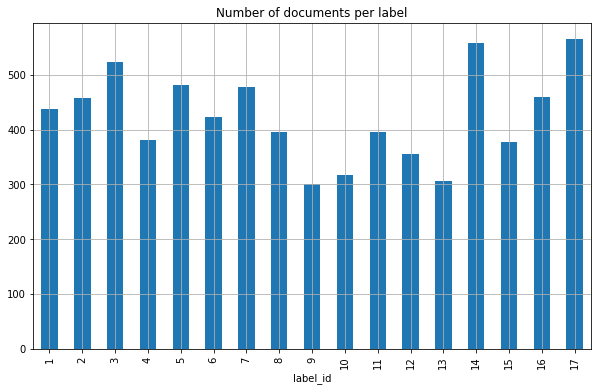

In [0]:
txt_per_label.plot(x='label_id', y='count', kind='bar', legend=False, grid=True, figsize=(10, 6))
plt.title("Number of documents per label")

## Number of labels per text

In [0]:
labels_per_text = labelled.labels.str.len()
labels_per_text = labels_per_text.value_counts().sort_index()
labels_per_text = labels_per_text.to_frame()
labels_per_text['percentage'] = labels_per_text.values/labels_per_text.values.sum()*100
labels_per_text.round(2)
#standard deviation
#labels_per_text.labels.std()
labels_per_text.labels
no_texts = 5182
# all absolute labels divided by documents, mean label/document
sum(labels_per_text.labels * labels_per_text.index)/no_texts


1.3921265920494017

Text(0.5, 0, 'Number of labels')

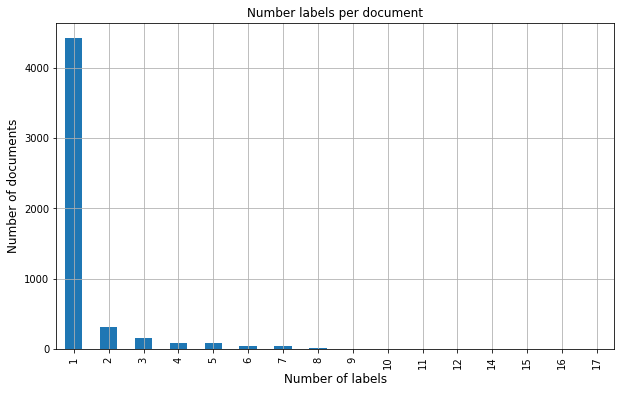

In [0]:
labels_per_text.plot(y='labels', kind='bar', legend=False, grid=True, figsize=(10, 6))
plt.title("Number labels per document")
plt.ylabel('Number of documents', fontsize=12)
plt.xlabel('Number of labels', fontsize=12)

## String length

Max string length: 6394
Min string length: 5
Mean string length: 502.43110768043226
Histogram of string lengths by document


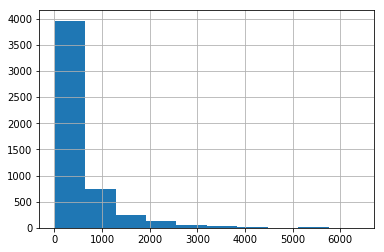

In [0]:
lens = labelled.text.str.len()
lens.hist()

print(f"Max string length: {lens.max()}")
print(f"Min string length: {lens.min()}")
print(f"Mean string length: {lens.mean()}")
print("Histogram of string lengths by document")

# Number of labelled documents with explicit labels

In [0]:
MAPPINGS = {
        'g': r'(sdgs|sdg|goals|goal)',
        't': r'(target)',
        'i': r'(indicator)'
    }
patterns = [
                MAPPINGS['g'] + r"\W*\s+(,?\s*\b\d{1,2}\b[and\s\b\d{1,2}\b]*)",
                MAPPINGS['t'] + r"(\s+\d+\.[\d+a-d])",
                MAPPINGS['i'] + r"(\s+\d+\.[\d+a-d]\.\d+)"
            ]
for pattern in patterns:
    print(pattern)

(sdgs|sdg|goals|goal)\W*\s+(,?\s*\b\d{1,2}\b[and\s\b\d{1,2}\b]*)
(target)(\s+\d+\.[\d+a-d])
(indicator)(\s+\d+\.[\d+a-d]\.\d+)


In [0]:
b = labelled

In [0]:
pat = r"(indicator)(\s+\d+\.[\d+a-d]\.\d+)|(target)(\s+\d+\.[\d+a-d])|(sdgs|sdg|goals|goal)\W*\s+(,?\s*\b\d{1,2}\b[and\s\b\d{1,2}\b]*)"

In [0]:
without_labels = b.text.str.replace(pat, ' SDGLABEL ', regex=True, flags=re.IGNORECASE)
without_labels = without_labels.str.replace('  ', ' ', regex=True, flags=re.IGNORECASE)

In [0]:
# https://stackoverflow.com/questions/31583151/count-number-of-rows-when-row-contains-certain-text
# Number of document containing labels
len(without_labels[without_labels.str.contains('SDGLABEL', flags=re.IGNORECASE)])

3230

In [0]:
without_labels[3]

'Rangita de Silva, Associate Dean of the University of Pennsylvania, focused on SDGLABEL particularly SDGLABEL ., which aims at ending all forms gender discrimination. She argued for dismantling de jure gender discrimination in the Law. She recalled that every single country has at least 4 laws that discriminate, directly or indirectly, against women and remembered that gender discrimination, has a very high cost, 28 trillion dollars per year,'

In [0]:
labelled.text[3]

'Rangita de Silva, Associate Dean of the University of Pennsylvania, focused on SDG 5, and particularly target 5.1., which aims at ending all forms gender discrimination. She argued for dismantling de jure gender discrimination in the Law. She recalled that every single country has at least 4 laws that discriminate, directly or indirectly, against women and remembered that gender discrimination, has a very high cost, 28 trillion dollars per year,'

# Label Co-occurrence matrix

In [0]:
mlb = MultiLabelBinarizer()
labels = pd.DataFrame(mlb.fit_transform(labelled.labels))
#df = pd.concat([labelled.text, labels], axis=1)

In [0]:
df_asint = labels.astype(int); df_asint
cooccurrence_matrix = df_asint.T.dot(df_asint)
cooccurrence_matrix.fillna(0)
label_headers = [str(i) for i in range(1,18)]

In [0]:
cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)
with np.errstate(divide='ignore', invalid='ignore'):
    cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(cooccurrence_matrix, cooccurrence_matrix_diagonal[:, None]))
print(cooccurrence_matrix_percentage)

# Add count in labels
label_header_with_count = [ '{0} ({1})'.format(label_header, cooccurrence_matrix_diagonal[label_number]) for label_number, label_header in enumerate(label_headers)]  
#label_header_with_count

[[1.         0.23744292 0.19178082 0.10502283 0.18493151 0.06164384
  0.07305936 0.20319635 0.12785388 0.13242009 0.0913242  0.06392694
  0.08219178 0.10502283 0.07762557 0.06621005 0.14155251]
 [0.22757112 1.         0.2166302  0.08533917 0.14223195 0.08315098
  0.06345733 0.1356674  0.11159737 0.06564551 0.07877462 0.08752735
  0.09190372 0.11597374 0.12253829 0.0547046  0.0940919 ]
 [0.16061185 0.18929254 1.         0.10133843 0.12428298 0.06309751
  0.07456979 0.0917782  0.08795411 0.07265774 0.08604207 0.06692161
  0.0707457  0.0917782  0.06118547 0.03824092 0.07265774]
 [0.12073491 0.1023622  0.13910761 1.         0.15223097 0.06824147
  0.06299213 0.15223097 0.06824147 0.09973753 0.06824147 0.07086614
  0.07611549 0.04199475 0.05511811 0.07086614 0.0656168 ]
 [0.16804979 0.13485477 0.13485477 0.12033195 1.         0.13900415
  0.06431535 0.13070539 0.10995851 0.093361   0.05394191 0.05394191
  0.07053942 0.07676349 0.03941909 0.09543568 0.10165975]
 [0.06382979 0.08983452 0.0780

In [0]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, value, ha="center", va="center", color=color, **kw)

def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='binary', vmin=0.0, vmax=104.0)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    #plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    #plt.colorbar(c, orientation='horizontal', )

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    # Font size
    plt.rc('font', size=10)

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(50, 25))

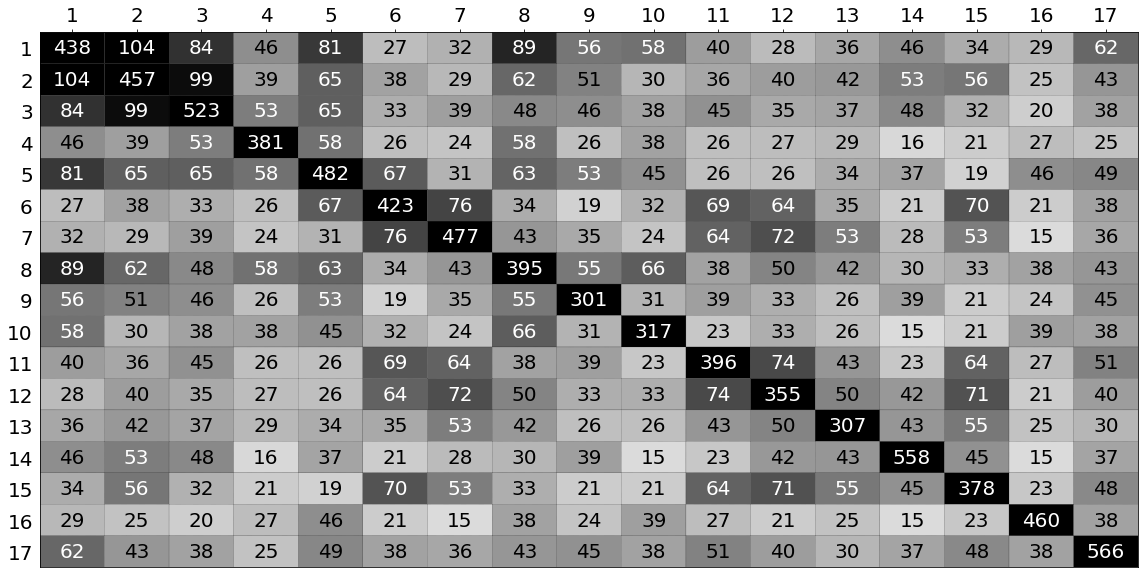

In [0]:
x_axis_size = cooccurrence_matrix.shape[0]
y_axis_size = cooccurrence_matrix.shape[1]
title = ""
xlabel= ''#"Labels"
ylabel= ''#"Labels"
xticklabels = label_headers
yticklabels = label_headers
heatmap(cooccurrence_matrix, title, xlabel, ylabel, xticklabels, yticklabels)
plt.savefig(base_dir+'image_output.svg', dpi=2000, format='svg', bbox_inches='tight')

In [0]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

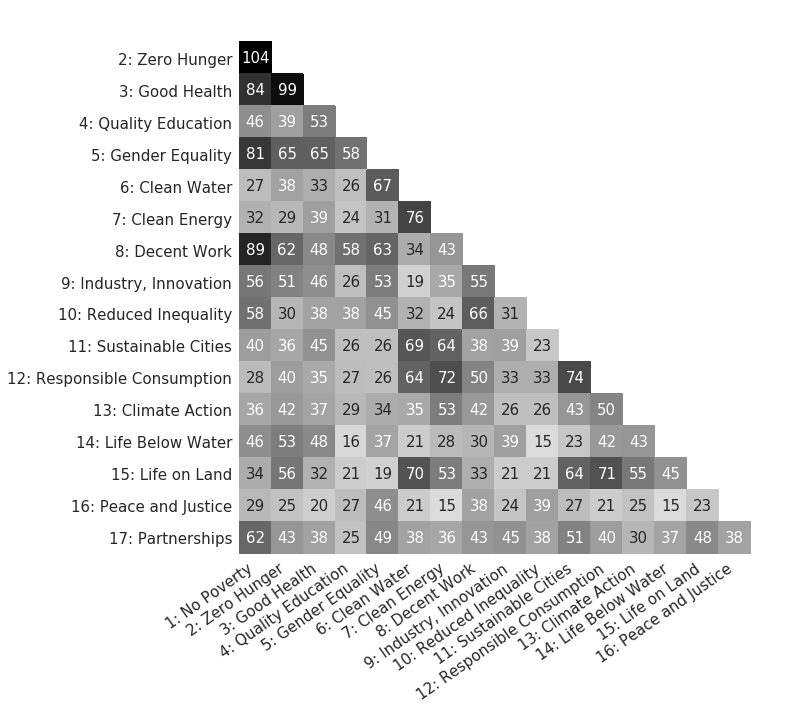

In [0]:
labels = ['',
          '2: Zero Hunger', 
          '3: Good Health', 
          '4: Quality Education', 
          '5: Gender Equality', 
          '6: Clean Water', 
          '7: Clean Energy', 
          '8: Decent Work', 
          '9: Industry, Innovation', 
          '10: Reduced Inequality', 
          '11: Sustainable Cities', 
          '12: Responsible Consumption', 
          '13: Climate Action', 
          '14: Life Below Water', 
          '15: Life on Land', 
          '16: Peace and Justice', 
          '17: Partnerships']
xlabels = ['1: No Poverty'] + labels[1:-1]


mask = np.zeros_like(cooccurrence_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 10))
plt.rc('font', size=15)


with sns.axes_style("white"):
    ax = sns.heatmap(cooccurrence_matrix, 
                     annot=True, 
                     mask=mask, 
                     square=True, 
                     fmt="d", 
                     vmin=0, 
                     vmax=104, 
                     cmap='binary', 
                     cbar=False,
                     yticklabels=labels)
    ax.set_xticklabels(xlabels, rotation=35, ha='right')
    plt.savefig(base_dir+'matrix.svg', dpi=2000, format='svg', bbox_inches='tight')